First project in lenear regression
The idea in this project is to analyze the factors that influence the variable Seoul Bike dataset by Exploring data for outliers and missing value, also plot the correlation between variable in the data and finally build the linear regression model to predict a good result.

what is linear regression?

linear regression is one of the machine learning algorithms used for predictive analysis. this algorithm is used to predict continuous/real or numeric variables such as sales, salary, age, product price. "Regression analysis is a statistical technique for investigating and modeling the relationship between variables. Relation between variables where changes in some variables may “explain” or possibly “cause” changes in other variables. Explanatory variables are termed the independent variables and the variables to be explained are termed the dependent variables. Regression model estimates the nature of the relationship between the independent and dependent variables. Change in dependent variables that results from changes in independent variables, i.e. size of the relationship. Strength of the relationship. Statistical significance of the relationship"

https://github.com/Tech-i-s/techis-ds-wiki/tree/master/Step%203-1%20Linear%20Regression

In [3]:
# the goal in this project is to analise the data( loking factors that influence the dependent variable - in this case Rented bike)
#explore data for outliers and missing values.
# Plot the correlation between the variables
# build a linear regression model to predict 

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

Create a variable data and read SeoulBikeData.csv using the pandas function called pd.read_csv file

In [4]:
dt=pd.read_csv("C:\\Users\\marce\\OneDrive\\Ambiente de Trabalho\\DataScience\\Linear_regretion_project\\SeoulBikeData.csv")

In [5]:
# print the 10 first elements from my data using the .head.
dt.head(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


# What are the factors that influence the number of bikes rented?

The factories that influence the number of bikes rented are : 
Temperature(C) because when we have a good weather the probability to get more number of bikes rented
Is high because people can enjoy more  the environment and is less at risk of having accidents for example


Get some information about my data using a info function

In [11]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

 Get some statist information about my data by using the describe function

In [12]:
dt.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


As we know, linear regression deal with numerical value, and as we saw in the data.info, we have some categorical variable (object
                                                                                                                          )
so let's exclude those variable for now and work just with numerical data. 
for data I will create a variable called df_num, where I will include just numerical variable


In [13]:
# numerical data
df_num = dt.select_dtypes(include=['float64','int64'])
df_num.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


Normally before building any model we should analyze our data and explore it very well beforehand. one of the tasks that we should do and check if we have missing values or not
for that, we can use the isna().sum function 

In [14]:
#Identifing missing Values
miss_val = df_num.isna().sum()
miss_val # no missing value

Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
dtype: int64

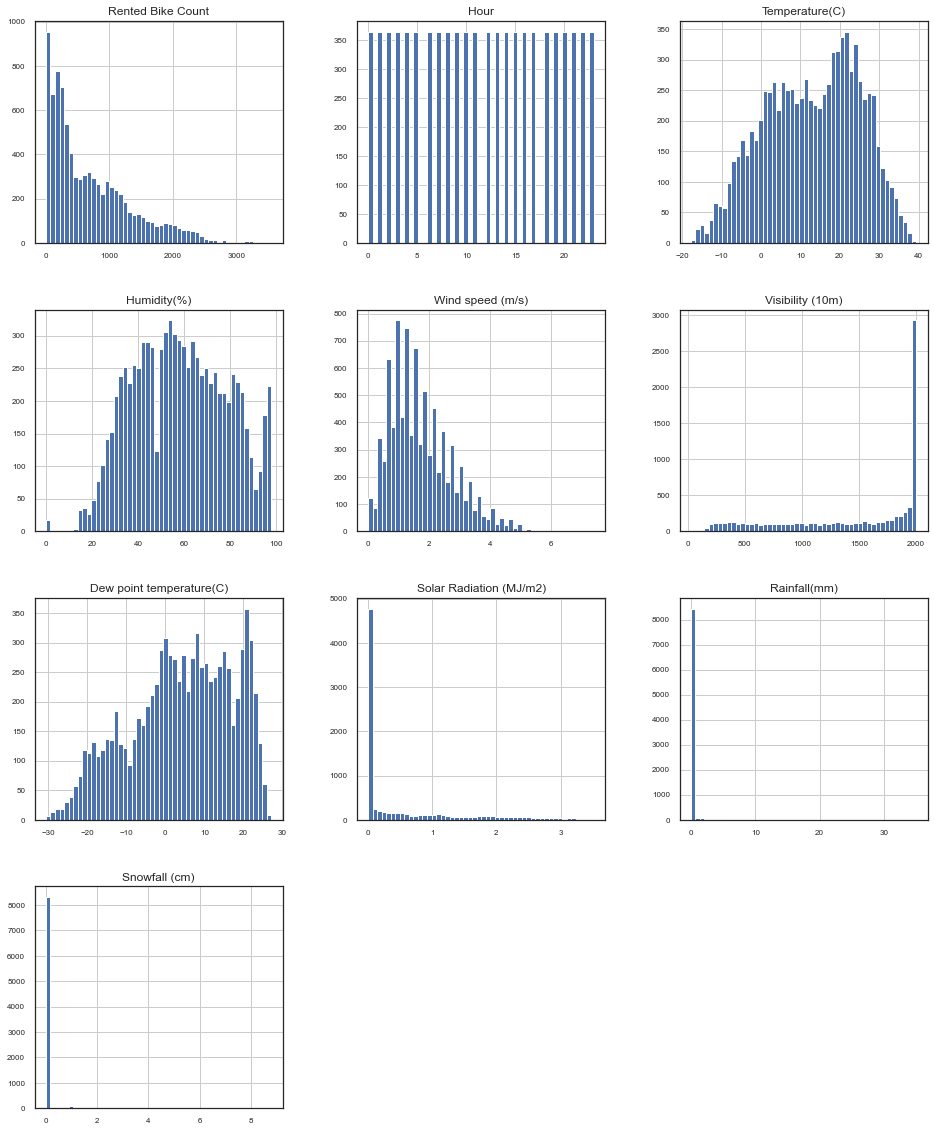

In [36]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


After looking for missing value, I will do the correlation between my dependent variable and all my independent variable. I will assume all correlation higher than 30% to be good for my analyze.
    the reason that I will assume that is because correlation between two variable less than 50% is not really good performance,
    but as we analyze the correlation between my variable, I assume 30% to get more variable for studying .


In [15]:
data_corr = df_num.corr()['Rented Bike Count'][1:]
golden_features_list = data_corr[abs(data_corr) > 0.3].sort_values(ascending=False)
print("There is {} strongly correlated values with Rented Bike Count:\n{}".format(len(golden_features_list), golden_features_list))

There is 3 strongly correlated values with Rented Bike Count:
Temperature(C)              0.538558
Hour                        0.410257
Dew point temperature(C)    0.379788
Name: Rented Bike Count, dtype: float64


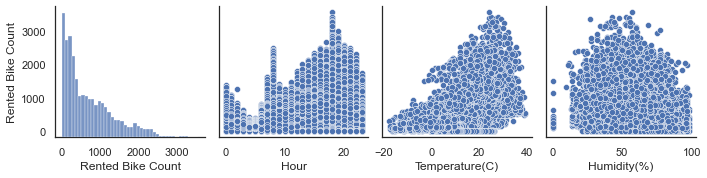

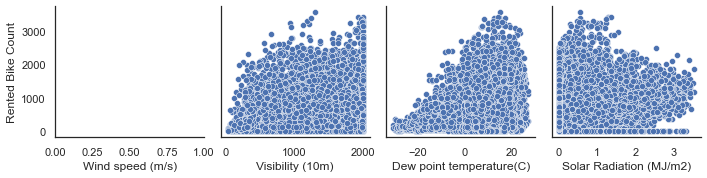

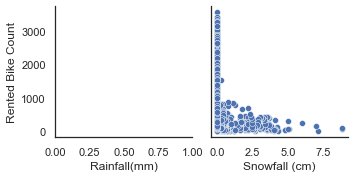

In [38]:
for i in range(0, len(df_num.columns), 4):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+4],
                y_vars=['Rented Bike Count'])

## NOTA

We can see, we have 1o element correlated with Rented bike Count, Rented bike count with Rented bick count we have a perfect correlation, we have a linear correlation Wind speed and Rainfall I could not see the result and I do not know that cause that, if I analyze the bar plot for those two variable and see the table as well I can see that, the value are two smaller, almost zero the correlation between Rented bike count and Hour, temperature wind, visibility, Dew point Solar Radiation are positive. we can see that, when Rented increase those positive correlation ship increases as well, We have some positive correlation between Rented bick and Hour, Temperature(C) and Wind speed (m/s). Also, some negative relationship.

In [ ]:
# define x and y,. dependent and indepent variable

In [16]:
# x=dt.drop(['Rented Bike Count'],axis=1).values
x=df_num.drop(['Rented Bike Count'],axis=1).values

x

In [62]:
x

array([[ 0. , -5.2, 37. , ...,  0. ,  0. ,  0. ],
       [ 1. , -5.5, 38. , ...,  0. ,  0. ,  0. ],
       [ 2. , -6. , 39. , ...,  0. ,  0. ,  0. ],
       ...,
       [21. ,  2.6, 39. , ...,  0. ,  0. ,  0. ],
       [22. ,  2.1, 41. , ...,  0. ,  0. ,  0. ],
       [23. ,  1.9, 43. , ...,  0. ,  0. ,  0. ]])

In [ ]:
# Nota Comvert objct data into numerical data to see if you have result more acurate

In [17]:
y= df_num['Rented Bike Count'].values

In [64]:
y

array([254, 204, 173, ..., 694, 712, 584], dtype=int64)

Explit the data set in trining by using the function train_test_function

In [20]:
from sklearn.model_selection import train_test_split

 put x and y variable in the train_test_split function

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [22]:
from sklearn.linear_model import LinearRegression


Construct the model

In [23]:
ln_reg = LinearRegression()
ln_reg.fit(x_train, y_train)

LinearRegression()

 pretict test result to see if i have acurat result

In [24]:
y_pred=ln_reg.predict(x_test)

In [25]:
print(y_pred)

[360.44112569 641.4680837  600.94354458 ... 449.76164137 161.36009834
 623.14504997]


 predict value for my first row


In [26]:
ln_reg.predict([[0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0]])

array([56.79203201])

Evaluate the model

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [28]:
r2_score(y_test,y_pred)

0.46243576495953687

In [29]:
# vizualize the predict result

In [30]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'atual_preditc')

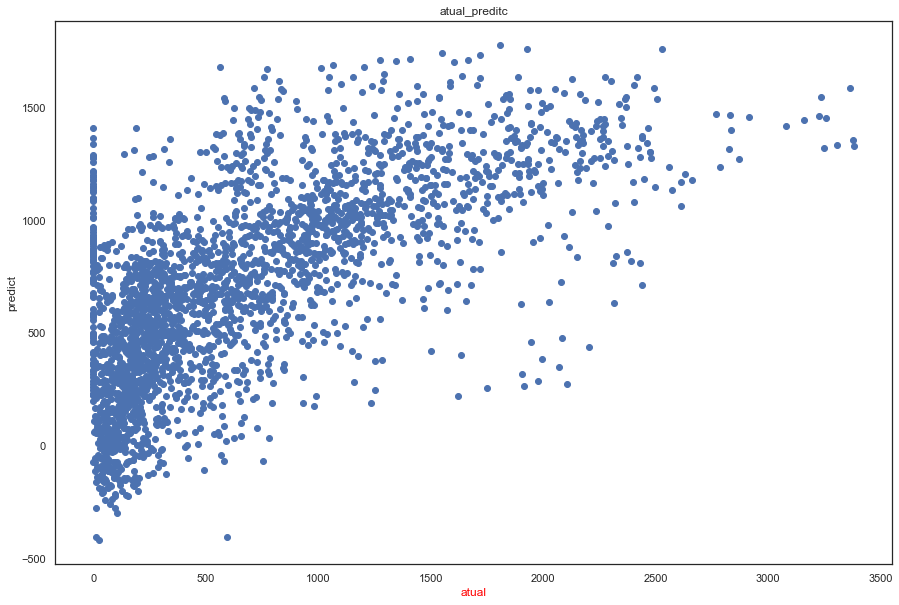

In [36]:
plt.figure(figsize=(15,10))
plt.scatter (y_test,y_pred)
plt.xlabel('atual', color='red' )
plt.ylabel('predict')
plt.title('atual_preditc')


In [40]:
# print the predict value for us model

In [86]:
predict_y_va=pd.DataFrame({'Actual_value':y_test,'Predict_value':y_pred,'Diference':y_test-y_pred })
# print the first 10 elem
predict_y_va[0:10]

,Actual_value,Predict_value,Diference
0,320,360.441126,-40.441126
1,580,641.468084,-61.468084
2,226,600.943545,-374.943545
3,165,422.283906,-257.283906
4,646,1387.452049,-741.452049
5,190,602.861911,-412.861911
6,59,884.907074,-825.907074
7,218,535.149609,-317.149609
8,1222,1299.063585,-77.063585
9,655,43.359066,611.640934


In [27]:
# the diference betweeen the actual and predict value are not closer, that's mean the model is not good

In [87]:
print("Dimension of train dataset", dt.shape)

Dimension of train dataset (8760, 14)


In [31]:
df_train = dt[:8760]

In [32]:
#Constructing correlation Matrix
data_corr = df_train.corr()
data_corr

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


In [ ]:
# the best fit line has to be calculate to minimaze the sum of square residuls

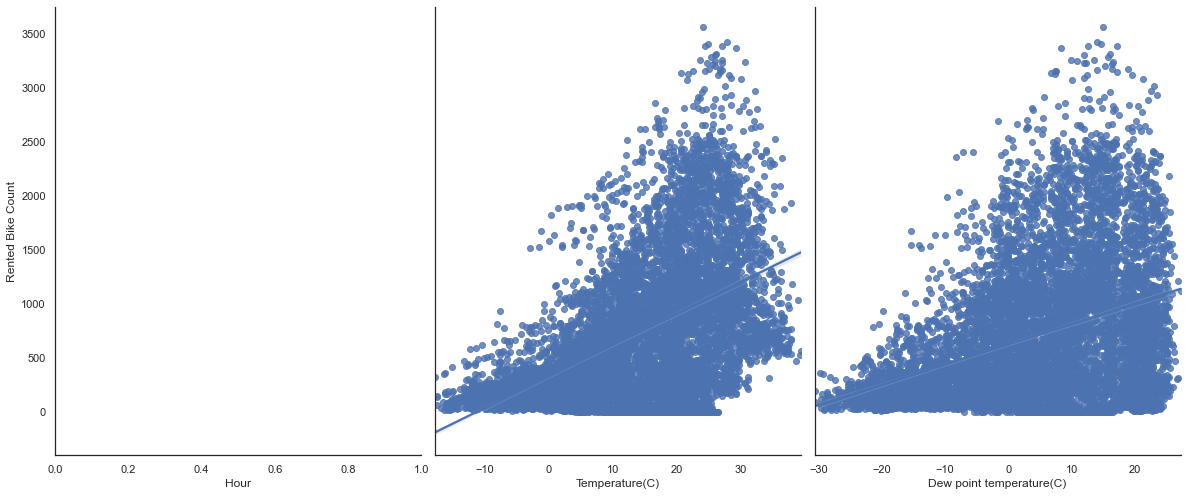

In [33]:
sns.pairplot(df_num,x_vars=['Hour','Temperature(C)','Dew point temperature(C)'],y_vars='Rented Bike Count',size=7,aspect=0.8,kind='reg')